In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'baseline_v1.4_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [8]:
bundleList = []
filtername = 'r'

sql = 'filter="%s"' % filtername
metric = metrics.NstarsMetric(filtername=filtername, crowding_error=0.1, metricName='Crowding_0.1')
slicer = slicers.HealpixSlicer()
summaryStats = [metrics.SumMetric()]
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))

metric = metrics.NstarsMetric(filtername=filtername, crowding_error=0.2, metricName='Crowding_0.2')
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))

metric = metrics.NstarsMetric(filtername=filtername, crowding_error=0.2, ignore_crowding=True, metricName='No_Crowding_0.2')
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))

metric = metrics.NstarsMetric(filtername=filtername, crowding_error=0.1, ignore_crowding=True, metricName='No_Crowding_0.1')
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))

bg = metricBundles.MetricBundleGroup(bundleList, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" for columns ['fieldDec', 'seeingFwhmGeom', 'fieldRA', 'fiveSigmaDepth']
Found 474955 visits
Running:  ['opsim_Crowding_0_1_r_HEAL', 'opsim_Crowding_0_2_r_HEAL', 'opsim_No_Crowding_0_2_r_HEAL', 'opsim_No_Crowding_0_1_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "filter="r"" constraint now.
monopole: 4838.2  dipole: lon: -117.803, lat: -32.3954, amp: 6158.37


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 461 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 10212.5  dipole: lon: -106.355, lat: -20.1827, amp: 15186.5


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 3646 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 14343.7  dipole: lon: -101.163, lat: -14.1819, amp: 23631.7


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 2699 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 10626.8  dipole: lon: -101.778, lat: -15.863, amp: 17344.9
Plotting complete.


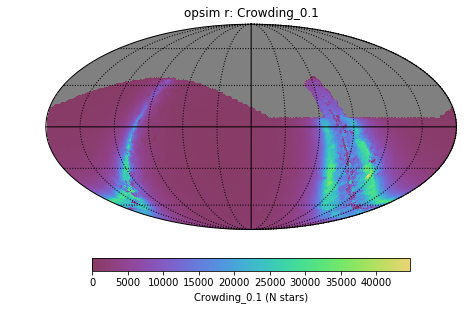

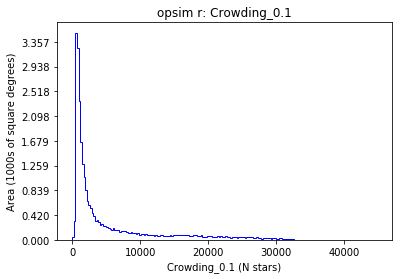

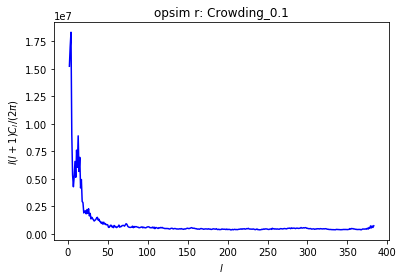

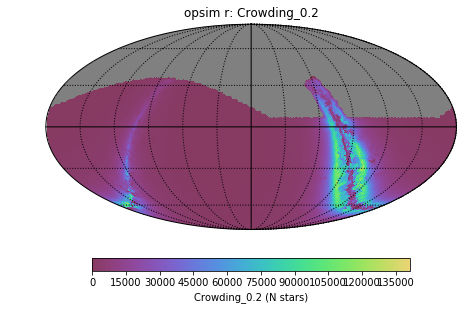

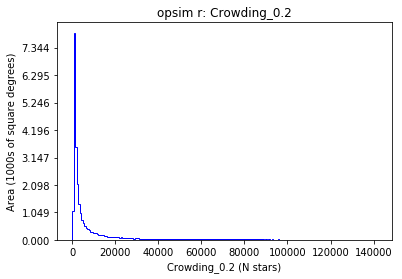

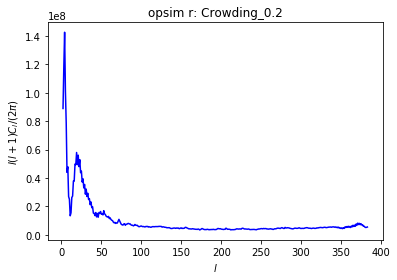

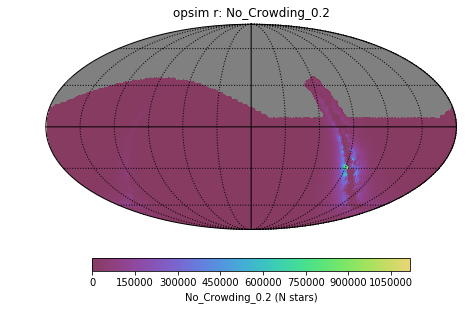

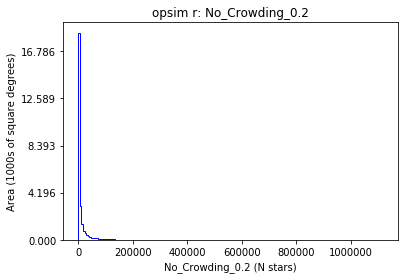

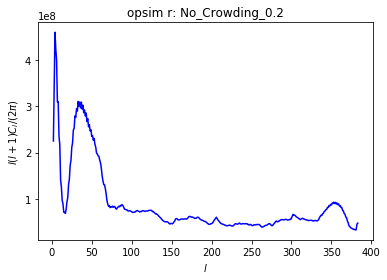

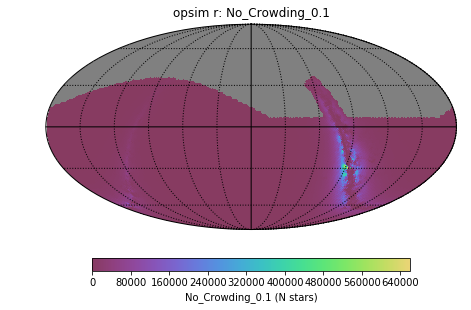

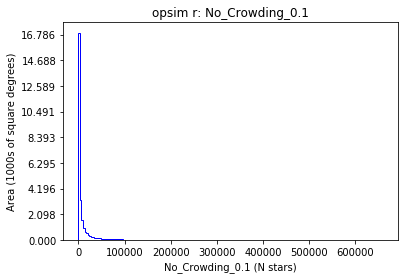

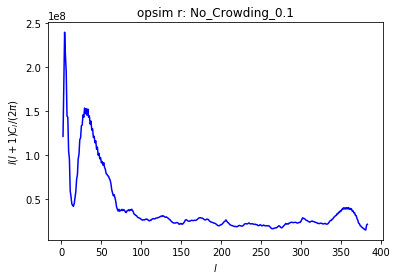

In [9]:
bg.plotAll(closefigs=False)

In [10]:
for b in bundleList:
    print(b.metric.name, b.summaryValues['Sum']/1e9)

Crowding_0.1 0.7221042437252752
Crowding_0.2 1.4135700614432056
No_Crowding_0.2 1.8882230982931882
No_Crowding_0.1 1.421006582194203
